<a href="https://colab.research.google.com/github/ORIE5355/project_competition_public/blob/main/run_gym_headtohead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import time
from IPython import display

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import make_env

In [4]:
project_part = 2 #TODO Change this for whether you're coding for part 1 or part 2!
agentnames = ['agent_coop_ex_ms', 'agent_coop_ex_custom_single_alpha']

In [5]:
if project_part == 1:
    env, agents = make_env.make_env_agents(agentnames = agentnames, project_part = project_part)
    
else:
    env, agents = make_env.make_env_agents(agentnames = agentnames, project_part = project_part
    , first_file = 'data/datafile1.csv', second_file='data/datafile2.csv')

# you can replace the agentnames to match whatever agentfiles you create. 
# you can use the same agentnames for both agents

In [6]:
T = 500

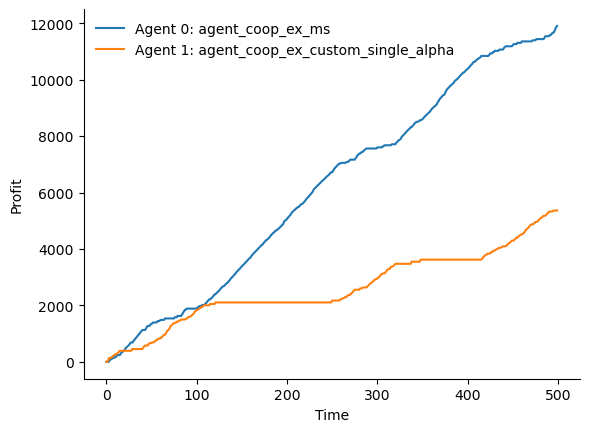

last customer covariate:  [1.81011656 0.68252191 6.52295792]
last (item bought, agent bought from, prices):  (1, 0, [[40.39963538594019, 36.784784024173454], [43.24101681304878, 54.95846449793238]])
current_profit per agent:  [11901.801588360535, 5362.735837267791]
Cumulative buyer utility: 10958.45463022709
Average per-customer runtime agent 0 in seconds: 0.036553134441375736
Average per-customer runtime agent 1 in seconds: 0.035601076602935794


In [7]:
env.reset()
customer_covariates, sale, profits = env.get_current_state_customer_to_send_agents()
last_customer_covariates = customer_covariates
cumulativetimes = [0 for _ in agents]

fig, ax = plt.subplots(figsize=(20, 10))
for t in range(0, T):
    actions = []
    for enoutside, agent in enumerate(agents):
      ts = time.time()
      action = agent.action((customer_covariates, sale, profits))
      assert len(action) == project_part ## Have to give 1 price for each item. There is 1 item in part 1, 2 items in part 2
      curtime = time.time()
      cumulativetimes[enoutside] += curtime - ts
      actions.append(action)
    customer_covariates, sale, profits = env.step(actions)
    newplot = env.render(True)
    if newplot:
      display.clear_output(wait=True)
      display.display(plt.gcf())
    print('last customer covariate: ', last_customer_covariates)
    print('last (item bought, agent bought from, prices): ', sale)
    print('current_profit per agent: ', profits)
    last_customer_covariates = customer_covariates
plt.close()
print("Cumulative buyer utility: {}".format(env.cumulative_buyer_utility))
print("Average per-customer runtime agent 0 in seconds: {}".format(cumulativetimes[0]/T))
print("Average per-customer runtime agent 1 in seconds: {}".format(cumulativetimes[1]/T))

In [5]:
def run_h2h(agentnames, T=500, num_runs=1, make_graphs=True):
    
    profits_cum = np.zeros((2,num_runs))
    
    if make_graphs:
        plt.rcParams.update({'font.size': 36})
        # Adjust rows and columns for at most two graphs per row
        cols = 2 if num_runs > 1 else 1
        rows = (num_runs + 1) // 2  # Calculate the number of rows needed
        fig, axes = plt.subplots(rows, cols, figsize=(20 * cols, 10 * rows))
        if rows == 1:
            axes = [axes]
    
    for i in range(num_runs):
        # Load them
        if project_part == 1:
            env, agents = make_env.make_env_agents(agentnames = agentnames, project_part = project_part)
        else:
            env, agents = make_env.make_env_agents(agentnames = agentnames, project_part = project_part
            , first_file = 'data/datafile1.csv', second_file='data/datafile2.csv')
        # do h2h
        env.reset()
        customer_covariates, sale, profits = env.get_current_state_customer_to_send_agents()
        last_customer_covariates = customer_covariates
        
        if make_graphs:
            run_profits = []
        for t in range(0, T):
            actions = []
            for enoutside, agent in enumerate(agents):
              action = agent.action((customer_covariates, sale, profits))
              assert len(action) == project_part ## Have to give 1 price for each item. There is 1 item in part 1, 2 items in part 2
              actions.append(action)
            customer_covariates, sale, profits = env.step(actions)
            last_customer_covariates = customer_covariates
            if make_graphs:
                run_profits.append(profits.copy())
            if t == T-1:
                profits_cum[0, i] = profits[0]
                profits_cum[1, i] = profits[1]
        if make_graphs:        
            ax = axes[i] if num_runs == 1 else axes[i // cols][i % cols]
            ax.plot([p[0] for p in run_profits], label=agentnames[0], linewidth=3)  # Plot for agent 0
            ax.plot([p[1] for p in run_profits], label=agentnames[1], linewidth=3)  # Plot for agent 1
            ax.set_title(f"Run {i + 1}", fontsize=42) 
            ax.set_xlabel("Timestep")
            ax.set_ylabel("Profit")
            ax.legend()
    
    print(f"{'Agent Name':<40} | {'Average Profit':>15} | {'Profit Variance':>15} | {'Min Profit':>10} | {'Max Profit':>10} | {'Total Profit':>10}")
    print('-'*117)
    for i in range(len(agentnames)):
        average_profit = np.mean(profits_cum[i, :])
        profit_variance = np.var(profits_cum[i, :])
        min_profit = np.min(profits_cum[i, :])
        max_profit = np.max(profits_cum[i, :])
        tot_profit = np.sum(profits_cum[i, :])

        print(f"{agentnames[i]:<40} | {average_profit:>15.2f} | {profit_variance:>15.2f} | {min_profit:>10.2f} | {max_profit:>10.2f} | {tot_profit:>10.2f}")
    if make_graphs:
        plt.tight_layout()
        plt.show()
    

In [7]:
agentnames = ['agent_coop_ex_ms', 'agent_coop_ex_custom_single_alpha']
run_h2h(agentnames, num_runs=1, make_graphs=False)

Agent Name                               |  Average Profit | Profit Variance | Min Profit | Max Profit | Total Profit
---------------------------------------------------------------------------------------------------------------------
agent_coop_ex_ms                         |          330.67 |            0.00 |     330.67 |     330.67 |     330.67
agent_coop_ex_custom_single_alpha        |           94.69 |            0.00 |      94.69 |      94.69 |      94.69
